**Dataset Download**

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d disisbig/hindi-text-short-and-large-summarization-corpus
!unzip hindi-text-short-and-large-summarization-corpus.zip
!kaggle datasets download -d rsrishav/wordcloud-hindi-font
!unzip wordcloud-hindi-font.zip

Saving kaggle.json to kaggle.json
kaggle.json
 98% 153M/157M [00:02<00:00, 73.7MB/s]
100% 157M/157M [00:02<00:00, 70.5MB/s]
Archive:  hindi-text-short-and-large-summarization-corpus.zip
  inflating: test.csv                
  inflating: train.csv               
  0% 0.00/718k [00:00<?, ?B/s]
100% 718k/718k [00:00<00:00, 138MB/s]
Archive:  wordcloud-hindi-font.zip
  inflating: Hindi_StopWords.txt     
  inflating: Nirmala.ttf             
  inflating: city_states_data.json   


**Library Install**

In [ ]:
!pip install inltk
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 7.5 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=30b59c5f7f3dc19f75bf08edd04d9031d8d57da6325304955798da958fe00fcd
  Stored i

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.0 MB/s eta 0:00:00


**Remove *Iterable* From error file core.py and replace below code**

In [ ]:
"""
try:
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
"""
from inltk.inltk import setup

**Import Library**

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from nltk.cluster.util import cosine_distance
import string
import math
import operator
from inltk.inltk import setup
import nltk
from nltk.tokenize import SpaceTokenizer
import re
from matplotlib.font_manager import FontProperties
hindi_font=FontProperties(fname = '/content/Nirmala.ttf')
from indicnlp.tokenize import sentence_tokenize
from inltk.inltk import get_sentence_similarity

**Download Stopwords**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Read Train File**

In [ ]:
train_dataset=pd.read_csv('/content/train.csv',nrows=200,delimiter=',')
train_dataset

,headline,summary,article
0,"उत्तर भारत में शीत लहर जारी, लेह में पारा सात ...",NaN,उत्तर भारत में शीत लहर जारी है और पहाड़ी क्षेत...
1,यमन : विद्रोहियों के कब्जे वाले ताएज शहर के नि...,NaN,यमन सरकार के समर्थक बलों के विद्रोहियों के कब्...
2,केन्या में आतंकियों ने बस को अगवा कर 28 लोगों ...,NaN,"केन्या के उत्तर में, सोमालिया के अल-शबाब गुट क..."
3,रिम करेगा दो हजार कर्मचारियों की छंटनी,ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रि...,ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रि...
4,Puducherry: उपराज्यपाल किरण बेदी से हुआ विवाद ...,NaN,केंद्र शासित प्रदेश पुडुचेरी के मुख्यमंत्री व...
...,...,...,...
195,श्रम मंत्रालय कंपनियों के लिए EPFO कवरेज की सी...,NaN,कर्मचारी भविष्य निधि संगठन (ईपीएफओ) के तहत अति...
196,"अन्ना, रामदेव का आंदोलन समयोचित : जनरल वीके सि...",पूर्व सेना प्रमुख जनरल वीके सिंह ने कहा है कि ...,पूर्व सेना प्रमुख जनरल वीके सिंह ने कहा है कि ...
197,दिल्ली आईआईटी के चार छात्रों की जैसलमेर के नजद...,NaN,राजस्थान के जैसलमेर के नजदीक हुए एक सड़क हादसे ...
198,"राष्ट्रपति, उपराष्ट्रपति, स्पीकर व अन्य ने दी...","राष्ट्रपति प्रणब मुखर्जी, उपराष्ट्रपति हामिद अ...","राष्ट्रपति प्रणब मुखर्जी, उपराष्ट्रपति हामिद अ..."


**Apply Pre-Processing**

In [ ]:
def remove_redundant_sentences(sentences):
    cleaned=[]
    for s in sentences:
        if s in cleaned or s.strip()=='':
            continue
        else:
            cleaned.append(s)
    return cleaned
def clean_corpus(corpus):
    corpus=corpus.replace('।','.')
    corpus=corpus.replace('\xa0','')
    corpus=corpus.replace('\n','')
    corpus=corpus.replace('\r','')
    return corpus
def get_clean_sentences(doc):
    cleaned_doc=clean_corpus(doc)
    sentences=cleaned_doc.split('.')
    sentences=remove_redundant_sentences(sentences)
    return sentences

sample=train_dataset.iloc[3] #3,198,199

print("Original=")
print(sample['article'][0:400])
clean_sentences=get_clean_sentences(sample['article'])
print("Clean=")
print(clean_sentences[0:400])

Original=
‘द ग्लोब एंड मेल’ ने कंपनी के नजदीकी सूत्रों के हवाले से प्रकाशित खबर में कहा है कि रिम वैश्विक स्तर पर बड़े पुनर्गठन की तैयारी कर रही है। अगले कुछ सप्ताह में वह वैश्विक स्तर पर 2,000 नौकरियों की कटौती करेगी। रिपोर्ट में कहा गया है कि छंट
Clean=
['ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी', '‘द ग्लोब एंड मेल’ ने कंपनी के नजदीकी सूत्रों के हवाले से प्रकाशित खबर में कहा है कि रिम वैश्विक स्तर पर बड़े पुनर्गठन की तैयारी कर रही है', ' अगले कुछ सप्ताह में वह वैश्विक स्तर पर 2,000 नौकरियों की कटौती करेगी', ' रिपोर्ट में कहा गया है कि छंटनी का आंकड़ा इससे भी बड़ा हो सकता है']


**Rule based text summarisation**

In [ ]:
import numpy as np
patternEnglish = re.compile(r'[[A-Z]|[a-z]]*')
patternNumeric = re.compile(r'.*[0-9]+')
patternBraces=re.compile(r'\[(.*?)\]|\{(.*?)\}|\((.*?)\)')
patternUrl=re.compile(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))")

def titlewordsScore(sentence,heading_titlewords):
    titlewords_sent=SpaceTokenizer().tokenize(sentence)
    titlewords_count=len(heading_titlewords)
    titlewords_sent=[word for word in titlewords_sent if word in heading_titlewords]
    s1_score=len(titlewords_sent)/titlewords_count
    return s1_score

def get_len_all_sentences(sentences):
    len_of_all_sent=[len(SpaceTokenizer().tokenize(sentence)) for sentence in sentences]
    max_length=np.max(len_of_all_sent)
    return max_length,len_of_all_sent

def searchEnglishWords(sentence):
    words=SpaceTokenizer().tokenize(sentence.strip())
    words=list(filter(None, words))
    english_words=[word for word in words if patternEnglish.match(word)!=None]
    return len(english_words)/len(words)

def positionScore(total_len):
    mid=(total_len/2)
    positions=(np.arange(total_len,mid,-1)/total_len).tolist()
    if (total_len%2==0):
        positions.extend((np.arange(mid+1,total_len+1,1)/total_len).tolist())
    else:
        positions.extend(np.arange(mid,total_len+1,1).tolist())
    return positions

def numericScore(sentence):
    words=SpaceTokenizer().tokenize(sentence)
    numbers=[1 for word in words if re.match(patternNumeric,word)]
    return np.sum(numbers)/len(words)

def bracesScore(sentence):
    t=re.findall(patternBraces,sentence)
    words=SpaceTokenizer().tokenize(sentence)
    insideTerms=()
    for term in t:
        insideTerms+=term
    insideTerms=[term for term in insideTerms if term !='']
    return (len(words)-len(insideTerms))/len(words)

def draw_zipf_distribution(sentences):
    zipf_distr={}
    for sentence in sentences:
        words=SpaceTokenizer().tokenize(sentence)
        for word in words:
            if word in zipf_distr:
                zipf_distr[word]+=1
            else:
                zipf_distr[word]=1
    fig=plt.figure(figsize=(10,10))
    plt.plot(zipf_distr.keys(),zipf_distr.values())
    plt.xticks(list(range(len(zipf_distr.keys()))), zipf_distr.keys(), color="b", fontproperties=hindi_font,rotation=45);
    plt.ylabel('Frequency')
    plt.title('Zipf Distribution')
    print(pd.DataFrame({"zipf_distr.keys()":zipf_distr.keys(),"zipf_distr.values()":zipf_distr.values()}))
    return zipf_distr

def keyword_score(sentences):
    zipf_distr=draw_zipf_distribution(sentences)
    keywords=[]
    count_keywords=round(0.1*len(zipf_distr))
    keywords=[x for x,y in reversed(sorted(zipf_distr.items(), key = operator.itemgetter(1)))][:count_keywords]
    keyword_score=[]
    for sentence in sentences:
        words=SpaceTokenizer().tokenize(sentence)
        keyword_score.append(len([word for word in words if word in keywords])/len(words))
    return keyword_score

def url_email_score(sentence):
    words=SpaceTokenizer().tokenize(sentence.strip())
    words=list(filter(None, words))
    urls=[word for word in words if patternUrl.match(word)!=None]
    return len(urls)/len(words)

stopwords=pd.read_csv('/content/Hindi_StopWords.txt')
stopwords=list(stopwords)
stopwords.extend(['में','के','है','से'])
stopwords

<ipython-input-9-8c63c53333e2>:2: FutureWarning: Possible nested set at position 1
  patternEnglish = re.compile(r'[[A-Z]|[a-z]]*')


["'अर्थात'",
 " 'कुछ'",
 " 'तेरी'",
 " 'साबुत'",
 " 'अपनि'",
 " 'हूं'",
 " 'काफि'",
 " 'यिह'",
 " 'जा'",
 " 'दे'",
 " 'देकर'",
 " 'रह'",
 " 'कह'",
 " 'कहा'",
 " 'बात' ",
 " 'जिन्हों'",
 " 'किर'",
 " 'कोई'",
 " 'हे'",
 " 'कोन'",
 " 'रहा'",
 " 'सब'",
 " 'सो'",
 " 'तक'",
 " 'इंहें'",
 " 'इसकि'",
 " 'अपनी'",
 " 'दबारा'",
 " 'सभि'",
 " 'होते'",
 " 'भीतर'",
 " 'निचे'",
 " 'घर'",
 " 'उन्हें'",
 " 'उन्ह'",
 " 'मेरे'",
 " 'था'",
 " 'व'",
 " 'इसमें'",
 " 'उसी'",
 " 'बिलकुल'",
 " 'होति'",
 " 'गया'",
 " 'सकता'",
 " 'अपना'",
 " 'लिये'",
 " 'उसका'",
 " 'पर'",
 " 'दवारा'",
 " 'गए'",
 " 'है'",
 " 'कितना'",
 " 'भि'",
 " 'लिए'",
 " 'वुह '",
 " 'ना'",
 " 'किसि'",
 " 'परन्तु'",
 " 'किन्हें'",
 " 'बहुत'",
 " 'भी'",
 " 'तुम्हारे'",
 " 'निहायत'",
 " 'उन्हीं'",
 " 'वहिं'",
 " 'हैं'",
 " 'उन्हों'",
 " 'इतयादि' ",
 "'यहाँ'",
 " 'तब'",
 " 'पूरा'",
 " 'क्योंकि'",
 " 'कौनसा'",
 " 'आप'",
 " 'हुअ'",
 " 'ऐसे'",
 " 'एस'",
 " 'कारण'",
 " 'अप'",
 " 'पहले'",
 " 'तुम'",
 " 'जेसा'",
 " 'तिस'",
 " 'लेकिन'",
 " 'कहते'",
 " '

   zipf_distr.keys()  zipf_distr.values()
0          ब्लैकबेरी                    1
1            हैंडसेट                    1
2              बनाने                    1
3               वाली                    1
4              कनाडा                    1
5                 की                    4
6              कंपनी                    2
7             रिसर्च                    1
8                 इन                    1
9               मोशन                    1
10             (रिम)                    1
11              अपनी                    1
12          पुनर्गठन                    2
13             योजना                    1
14                के                    3
15               तहत                    1
16              अगले                    2
17               कुछ                    2
18            सप्ताह                    2
19               में                    4
20           वैश्विक                    3
21              स्तर                    3
22                पर              

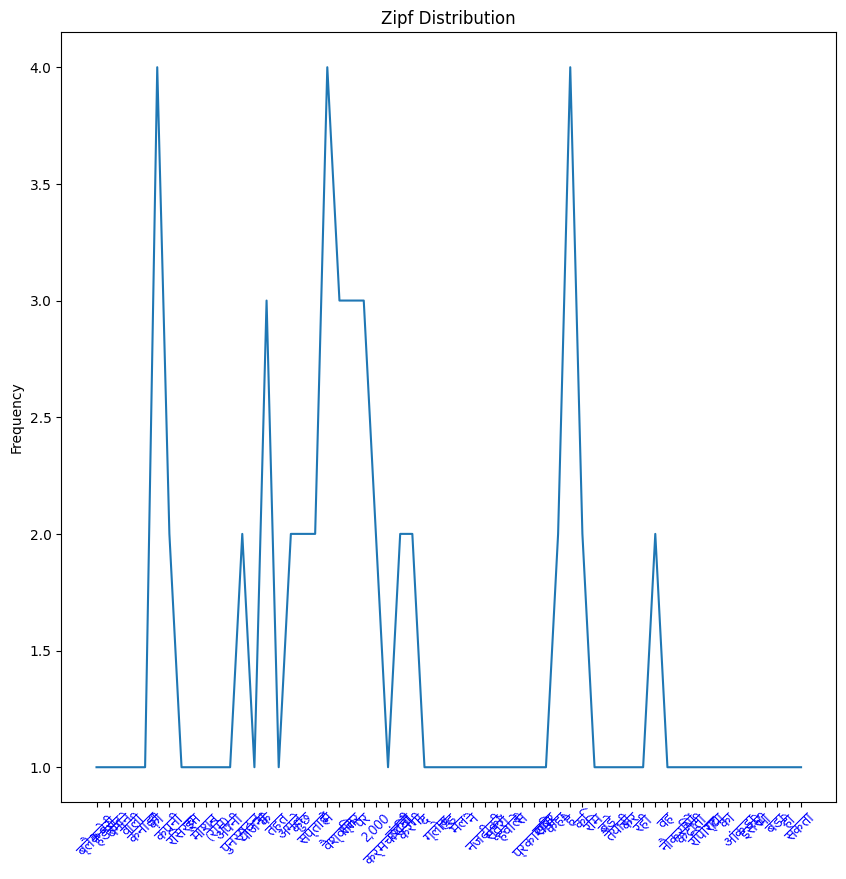

In [ ]:
def generate_summary_rule_based(clean_sentences,compression_ratio):
    score_table=pd.DataFrame(clean_sentences)
    score_table.columns=['sentence']
    headlinetokens=SpaceTokenizer().tokenize(sample['headline'])
    heading_titlewords=[ word for word in  headlinetokens if word!= '' and word not in stopwords]
    score_table['S1']=[titlewordsScore(sentence,heading_titlewords) for sentence in clean_sentences]
    max_length,len_of_all_sent=get_len_all_sentences(clean_sentences)
    score_table['S2']=[x/max_length for x in len_of_all_sent]
    score_table['S3']=[searchEnglishWords(sentence) for sentence in clean_sentences]
    score_table['S4']=[numericScore(sentence) for sentence in clean_sentences]
    score_table['S5']=[bracesScore(sentence) for sentence in clean_sentences]
    score_table['S6']=keyword_score(clean_sentences)
    score_table['S7']=[url_email_score(sentence) for sentence in clean_sentences]
    #score_table['S8']=positionScore(len(clean_sentences))
    score_table['Total']=score_table['S1']+score_table['S2']+score_table['S3']+score_table['S4']+score_table['S5']+score_table['S6']+score_table['S7']
    summary_sent_count=round(compression_ratio*len(clean_sentences))
    summary_sent=list(score_table.sort_values('Total',ascending=False).iloc[0:summary_sent_count]['sentence'])
    summary=""
    for sentence in summary_sent:
        summary+=sentence.strip()+"| "
    return summary
summary_rule_based=generate_summary_rule_based(clean_sentences,0.4)

In [ ]:
print("Actual Summary=")
print(sample['summary'])
print('Summary obtained from rule based strategy=')
print(summary_rule_based)

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform([sample['summary'],summary_rule_based])
pairwise_similarity = tfidf * tfidf.T
print("Rule based Similarity=",pairwise_similarity.toarray()[0][1])

Actual Summary=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी।
Summary obtained from rule based strategy=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी| ‘द ग्लोब एंड मेल’ ने कंपनी के नजदीकी सूत्रों के हवाले से प्रकाशित खबर में कहा है कि रिम वैश्विक स्तर पर बड़े पुनर्गठन की तैयारी कर रही है| 
Rule based Similarity= 0.8321268217791178


**Text summarization using Term frequency**

In [ ]:
from nltk.tokenize import sent_tokenize
def create_frequency_table(sentences):
    word_freq={}
    for sentence in sentences:
        words=SpaceTokenizer().tokenize(sentence)
        for word in words:
            if word in stopwords:
                continue
            if word in word_freq:
                word_freq[word]+=1
            else:
                word_freq[word]=1
    return word_freq
def score_sentences(sentences,word_freq):
    sentenceValue={}
    for sentence in sentences:
        words_in_sentence=SpaceTokenizer().tokenize(sentence)
        word_count=len(words_in_sentence)
        for word in word_freq:
            if word in words_in_sentence:
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]]+=word_freq[word]
                else:
                    sentenceValue[sentence[:10]]=word_freq[word]
        sentenceValue[sentence[:10]]=sentenceValue[sentence[:10]]/word_count
    return sentenceValue
def average_sentence_value(sentenceValues):
    sum_values=0
    for sent_id in sentenceValues:
        sum_values+=sentenceValues[sent_id]
    sent_count=len(sentenceValues)
    return sum_values/sent_count

def generate_summary(avg_score,sentences,sentenceValue,identifier):
    sentence_count=0
    summary=''
    for sentence in sentences:
        if sentence[:identifier] in sentenceValue and sentenceValue[sentence[:identifier]]>=avg_score:
            summary+=sentence.strip()+"| "
            sentence_count+=1
    return summary,sentence_count
def summarise_term_frequency_sentence_weighing(sentences):
    word_freq_table=create_frequency_table(sentences)
    scores=score_sentences(sentences,word_freq_table)
    avg_score=average_sentence_value(scores)
    summary,sent_count=generate_summary(avg_score,sentences,scores,10)
    print(pd.DataFrame({"word_freq_table":word_freq_table}))
    return summary
summary_tf_weight=summarise_term_frequency_sentence_weighing(clean_sentences)

             word_freq_table
                           2
(रिम)                      1
2,000                      2
अगले                       2
अपनी                       1
आंकड़ा                     1
इन                         1
इससे                       1
एंड                        1
कंपनी                      2
कटौती                      1
कनाडा                      1
कर                         1
करेगी                      2
कर्मचारियों                1
कहा                        2
का                         1
कि                         2
की                         4
कुछ                        2
खबर                        1
गया                        1
ग्लोब                      1
छंटनी                      2
तहत                        1
तैयारी                     1
नजदीकी                     1
ने                         1
नौकरियों                   1
पर                         3
पुनर्गठन                   2
प्रकाशित                   1
बड़ा                       1
बड़े          

In [ ]:
print("Actual Summary=")
print(sample['summary'])
print('Summary obtained from Term frequency=')
print(summary_tf_weight)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform([sample['summary'],summary_tf_weight])
pairwise_similarity = tfidf * tfidf.T
print("Term frequency Similarity=",pairwise_similarity.toarray()[0][1])

Actual Summary=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी।
Summary obtained from Term frequency=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी| अगले कुछ सप्ताह में वह वैश्विक स्तर पर 2,000 नौकरियों की कटौती करेगी| 
Term frequency Similarity= 0.9087027563031187


**Text Summarization using TF-IDF scores of sentences**

In [ ]:
def calc_term_frequency_sentence_wise(sentences):
    freq_matrix={}
    for sentence in sentences:
        words=SpaceTokenizer().tokenize(sentence)
        sent_freq_table={}
        for word in words:
            if word in stopwords:
                continue
            if word in sent_freq_table:
                sent_freq_table[word]+=1
            else:
                sent_freq_table[word]=1
        freq_matrix[sentence[:15]]=sent_freq_table
    return freq_matrix

def calc_tf_matrix(freq_matrix):
    for sentence,sent_freq_table in freq_matrix.items():
        tf_sent={}
        sent_len=len(sent_freq_table)
        for word in sent_freq_table:
            sent_freq_table[word]/=sent_len
    return freq_matrix

def calc_sentence_frequency(freq_matrix):
    sent_freq={}
    for sentence,freq_matrix_sent in freq_matrix.items():
        for word,count in freq_matrix_sent.items():
            if word in sent_freq:
                sent_freq[word]+=1
            else:
                sent_freq[word]=1
    return sent_freq

def calc_idf_score(total_sentences,sent_freq,freq_matrix):
    idf={}
    for sentence,freq_matrix_sent in freq_matrix.items():
        idf_sent={}
        for word in freq_matrix_sent:
            idf_sent[word]=math.log10(total_sentences / float(sent_freq[word]))
        idf[sentence]=idf_sent
    return idf

def calc_tf_idf_score(tf,idf):
    tf_idf={}
    for (sentence1,tf_sent),(sentence2,idf_sent) in zip(tf.items(),idf.items()):
        tf_idf_sent={}
        for (word1,tf_score),(word2,idf_score) in zip(tf_sent.items(),idf_sent.items()):
            tf_idf_sent[word1]=tf_score*idf_score
        tf_idf[sentence1]=tf_idf_sent
    return tf_idf

def calc_tf_idf_score_sentence_wise(tf_idf_matrix):
    tf_idf={}
    for sentence,tf_idf_sent in tf_idf_matrix.items():
        tf_idf_sentence=0
        for word,tf_idf_score in tf_idf_sent.items():
            tf_idf_sentence+=tf_idf_score
        tf_idf[sentence]=tf_idf_sentence
    return tf_idf
def get_tf_idf(sentences):
    sent_freq_matrix=calc_term_frequency_sentence_wise(sentences)
    freq_matrix=calc_tf_matrix(sent_freq_matrix)
    total_sentences=len(sentences)
    sent_freq=calc_sentence_frequency(freq_matrix)
    idf=calc_idf_score(total_sentences,sent_freq,freq_matrix)
    tf_idf_matrix=calc_tf_idf_score(freq_matrix,idf)
    tf_idf=calc_tf_idf_score_sentence_wise(tf_idf_matrix)
    return tf_idf

def summarise_tf_idf_sentence_weighting(sentences):
    tf_idf=get_tf_idf(sentences)
    sentences=remove_redundant_sentences(sentences)
    avg_tf_idf_score=average_sentence_value(tf_idf)
    tf_idf_summary,sent_count=generate_summary(avg_tf_idf_score,sentences,tf_idf,15)
    print(pd.DataFrame({"TF-IDF":tf_idf}))
    return tf_idf_summary
summary_tf_idf_weight=summarise_tf_idf_sentence_weighting(clean_sentences)

                   TF-IDF
 अगले कुछ सप्ता  0.316317
 रिपोर्ट में कह  0.509435
ब्लैकबेरी हैंडस  0.434389
‘द ग्लोब एंड मे  0.466729


In [ ]:
print("Actual Summary=")
print(sample['summary'])
print('Summary obtained from TF-IDF scores of sentences=')
print(summary_tf_idf_weight)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform([sample['summary'],summary_tf_idf_weight])
pairwise_similarity = tfidf * tfidf.T
print("TF-IDF Similarity=",pairwise_similarity.toarray()[0][1])

Actual Summary=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी।
Summary obtained from TF-IDF scores of sentences=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी| ‘द ग्लोब एंड मेल’ ने कंपनी के नजदीकी सूत्रों के हवाले से प्रकाशित खबर में कहा है कि रिम वैश्विक स्तर पर बड़े पुनर्गठन की तैयारी कर रही है| रिपोर्ट में कहा गया है कि छंटनी का आंकड़ा इससे भी बड़ा हो सकता है| 
TF-IDF Similarity= 0.7276608052535845


**clustering TF-IDF scores of sentences (KMeans)**

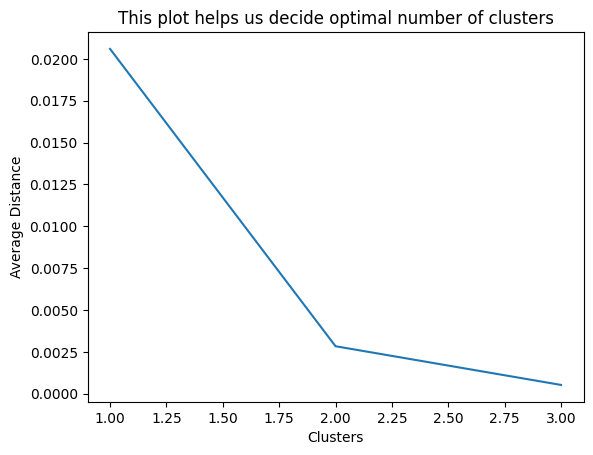

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
def decide_optimal_clusters(tf_idf,n_clusters):
    tf_idf_scores=[]
    for sent,tf_idf_score in tf_idf.items():
        tf_idf_scores.append(tf_idf_score)
    tf_idf_scores_np=np.array(tf_idf_scores).reshape(-1,1)
    #n_clusters=[2,3,4,5]
    avg_distance=[]
    for cluster in n_clusters:
        clusterer=KMeans(n_clusters=cluster).fit(tf_idf_scores_np)
        avg_distance.append(clusterer.inertia_)
    plt.plot(n_clusters,avg_distance)
    plt.xlabel('Clusters')
    plt.ylabel('Average Distance');
    plt.title('This plot helps us decide optimal number of clusters')
    return tf_idf_scores_np
def cluster_sentences_tfidf_scores(opt_clusters,tf_idf_scores_np):
    #opt_clusters=4
    opt_clusterer=KMeans(n_clusters=opt_clusters)
    opt_clusterer.fit(tf_idf_scores_np)
    label_freq={}
    for label in opt_clusterer.labels_:
        if label in label_freq:
            label_freq[label]+=1
        else:
            label_freq[label]=1
    max_cluster_label=max(label_freq.items(),key=operator.itemgetter(1))[0]
    return max_cluster_label,opt_clusterer
def generate_summary_kmeans(sentences,tf_idf,opt_clusterer,max_cluster_label):
    summary=""
    for sentence in sentences:
        if sentence[:15] in tf_idf and opt_clusterer.predict(np.array(tf_idf[sentence[:15]]).reshape(-1,1)) == max_cluster_label:
            summary+=sentence.strip()+"| "
    return summary
tf_idf=get_tf_idf(clean_sentences)
n_clusters=[1,2,3]
tf_idf_scores_np=decide_optimal_clusters(tf_idf,n_clusters)
opt_clusters=3
max_cluster_label,opt_clusterer=cluster_sentences_tfidf_scores(opt_clusters,tf_idf_scores_np)
summary_kmeans=generate_summary_kmeans(clean_sentences,tf_idf,opt_clusterer,max_cluster_label)

In [ ]:
print("Actual Summary=")
print(sample['summary'])
print('Summary generated by clustering tf-idf scores of sentences kmeans=')
print(summary_kmeans)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform([sample['summary'],summary_kmeans])
pairwise_similarity = tfidf * tfidf.T
print("tf-idf kmeans Similarity=",pairwise_similarity.toarray()[0][1])

Actual Summary=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी।
Summary generated by clustering tf-idf scores of sentences kmeans=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी| ‘द ग्लोब एंड मेल’ ने कंपनी के नजदीकी सूत्रों के हवाले से प्रकाशित खबर में कहा है कि रिम वैश्विक स्तर पर बड़े पुनर्गठन की तैयारी कर रही है| 
tf-idf kmeans Similarity= 0.8321268217791178


**Text Summarization using TextRank**

In [ ]:
def preprocess_textrank(text):
  formatted_text = re.sub(r'\s+', ' ', text)
  formatted_text = formatted_text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)
  return formatted_text

def calculate_sentence_similarity(sentence1, sentence2):
  words1 = [word for word in nltk.word_tokenize(sentence1)]
  words2 = [word for word in nltk.word_tokenize(sentence2)]
  all_words = list(set(words1 + words2))
  vector1 = [0] * len(all_words)
  vector2 = [0] * len(all_words)
  for word in words1:
    vector1[all_words.index(word)] += 1
  for word in words2:
    vector2[all_words.index(word)] += 1
  return 1 - cosine_distance(vector1, vector2)

def calculate_similarity_matrix(sentences):
  similarity_matrix = np.zeros((len(sentences), len(sentences)))
  #print(similarity_matrix)
  for i in range(len(sentences)):
    for j in range(len(sentences)):
      if i == j:
        continue
      similarity_matrix[i][j] = calculate_sentence_similarity(sentences[i], sentences[j])
  return similarity_matrix

def print_sentence_scores(original_sentences):
    for i, score in enumerate(original_sentences):
        print(i, score)

def summarize(clean_sentences, percentage = 0):
  #original_sentences=sentence_tokenize.sentence_split(original_text, lang='hi')
  #formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  similarity_matrix = calculate_similarity_matrix(clean_sentences)
  similarity_graph = nx.from_numpy_array(similarity_matrix)
  scores = nx.pagerank(similarity_graph)
  ordered_scores = sorted(((scores[i], score) for i, score in enumerate(clean_sentences)), reverse=True)
  number_of_sentences=int(len(clean_sentences))
  if percentage > 0:
    number_of_sentences = int(len(clean_sentences) * percentage)
  best_sentences = []
  for sentence in range(number_of_sentences):
    best_sentences.append(ordered_scores[sentence][1])
  return best_sentences, ordered_scores
def generate_summary_textrank(clean_sentences,best_sentences):
    sent_dict={}
    ordered_list_of_sentences=[]
    for sent in clean_sentences:
        if sent[:15] in sent_dict:
            pass
        else:
            sent_dict[sent[:15]]=sent
            ordered_list_of_sentences.append(sent)
    summary_text=""
    for sent in ordered_list_of_sentences:
        if sent in best_sentences:
            summary_text+=sent+". "
    return summary_text
best_sentences,textrank_scores=summarize(clean_sentences, percentage = 0.3)
dff=pd.DataFrame({"Sentence Vs Score":textrank_scores})
dff

,Sentence Vs Score
0,"(0.2996845946324729, ब्लैकबेरी हैंडसेट बनाने व..."
1,"(0.27590445227979465, ‘द ग्लोब एंड मेल’ ने कंप..."
2,"(0.266705322917781, अगले कुछ सप्ताह में वह वै..."
3,"(0.15770563016995132, रिपोर्ट में कहा गया है ..."


In [ ]:
summary_textrank=generate_summary_textrank(clean_sentences,best_sentences)
print("Actual Summary=")
print(sample['summary'])
print('Summary obtained from textrank=')
print(summary_textrank)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=2)
tfidf = vect.fit_transform([sample['summary'],summary_textrank])
pairwise_similarity = tfidf * tfidf.T
print("TextRank Similarity=",pairwise_similarity.toarray()[0][1])

Actual Summary=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी।
Summary obtained from textrank=
ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की कंपनी रिसर्च इन मोशन (रिम) अपनी पुनर्गठन योजना के तहत अगले कुछ सप्ताह में वैश्विक स्तर पर 2,000 कर्मचारियों की छंटनी करेगी. 
TextRank Similarity= 0.9999999999999997
